# A simple example of lensing estimator normalization calculation (Asymmetric estimator)
This code compute normalization of quadratic estiamtors

In [1]:
# external
import numpy as np, sys
from matplotlib.pyplot import *

In [2]:
# add path to tempura
path_to_tempura = "/global/homes/t/toshiyan/Work/Lib/tempura_dev/" # please change this path
sys.path.append(path_to_tempura) # example
import pytempura as cs

First define parameters

In [3]:
Tcmb  = 2.726e6    # CMB temperature
Lmax  = 3000       # maximum multipole of output normalization
lmax  = 3000
rlmin, rlmax = 2, 3000  # CMB multipole range for reconstruction
glmin, glmax = 2, 3000
llmin, llmax = 2, 3000
L = np.linspace(0,Lmax,Lmax+1)
l = L.copy()
Lfac = (L*(L+1.))**2/2./np.pi

Load arrays of lensed CMB Cls. The Cls should not be multiplied by any factors and should not have units.  

In [4]:
lcl = np.zeros((4,lmax+1)) # TT, EE, BB, TE
lcl[:,2:] = np.loadtxt('data/lensedcls.dat',unpack=True,usecols=(1,2,3,4))[:,:lmax-1] 
lcl *= 2.*np.pi / (l**2+l+1e-30) / Tcmb**2
ucl = np.zeros((5,lmax+1)) # TT, EE, TE, pp, Tp
ucl[:,2:] = np.loadtxt('data/unlensedcls.dat',unpack=True,usecols=(1,2,3,4,5))[:,:lmax-1] 

Define observed CMB cls. Here, two CMB noise (high and low resolution).

In [5]:
ac2rad = np.pi/10800.
sigmaG = 40.
sigmaL = 20.
thetaG = 7.
thetaL = 1.5
nlG = (sigmaG*ac2rad/Tcmb)**2 * np.exp(L*(L+1.)*(thetaG*ac2rad)**2/8./np.log(2.))
nlL = (sigmaL*ac2rad/Tcmb)**2 * np.exp(L*(L+1.)*(thetaL*ac2rad)**2/8./np.log(2.)) * (1+(L/3000.)**(-4.))
nlL[:500] = 1e30

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys


In [6]:
oclG = lcl[0] + nlG # observed Cl
oclL = lcl[0] + nlL

### Compute normalization

In [7]:
Ag0, Ac0 = cs.norm_general.qtt_asym('lens',Lmax,glmin,glmax,llmin,llmax,llmax,lcl[0,:],oclG,oclL)

In [8]:
Ag1, Ac1 = cs.norm_lens.qtt(Lmax,rlmin,rlmax,lcl[0],oclL)
Ag2, Ac2 = cs.norm_lens.qtt(Lmax,rlmin,rlmax,lcl[0],oclG)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


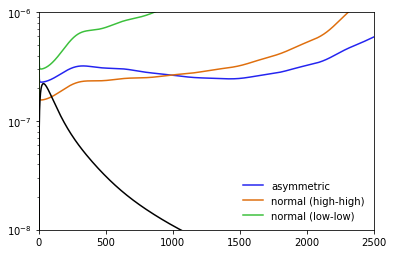

In [20]:
# plot spectra (gradient)
xlim(0,2500)
ylim(1e-8,1e-6)
#xscale('log')
yscale('log')
plot(L,Lfac*Ag0,label='asymmetric')
plot(L,Lfac*Ag1,label='normal (high-high)')
plot(L,Lfac*Ag2,label='normal (low-low)')
plot(L,ucl[3]/Tcmb**2*(L+1)**2/(L**2)/4.,color='k')
legend()
#savefig('test.png')

### Compute noise spectrum

In [10]:
a0a1 = oclL.copy()
b0b1 = oclG.copy()
a0b1 = lcl[0]
a1b0 = lcl[0]

In [11]:
wx0  = 1./oclL
wx1  = wx0.copy()
wxy0 = np.zeros(rlmax+1)
wxy0[rlmin:] = lcl[0][rlmin:]/oclG[rlmin:]
wxy1 = wxy0.copy()

In [12]:
Ng0, Nc0 = cs.noise_spec.qtt_asym('lens',Lmax,rlmin,rlmax,wx0,wxy0,wx1,wxy1,a0a1,b0b1,a0b1,a1b0)

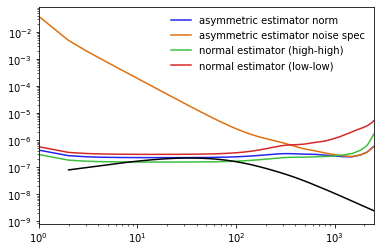

In [23]:
xlim(1,2500)
#ylim(1e-8,1e-6)
xscale('log')
yscale('log')
plot(L,Lfac*Ag0,label='asymmetric estimator norm')
plot(L,Lfac*Ag0**2*Ng0,label='asymmetric estimator noise spec')
plot(L,Lfac*Ag1,label='normal estimator (high-high)')
plot(L,Lfac*Ag2,label='normal estimator (low-low)')
plot(L[2:],ucl[3][2:]/Tcmb**2*(L[2:]+1)**2/(L[2:]**2)/4.,color='k')
legend()

In [25]:
a0b1 = oclL.copy()
b0a1 = oclG.copy()
a0a1 = lcl[0]
b0b1 = lcl[0]

In [26]:
wx0  = 1./oclL
wx1  = 1./oclG
wxy0 = lcl[0]/oclG
wxy1 = lcl[0]/oclL

In [27]:
Xg0, Xc0 = cs.noise_spec.qtt_asym('lens',Lmax,rlmin,rlmax,wx0,wxy0,wx1,wxy1,a0a1,b0b1,a0b1,a1b0)

In [28]:
Bg0, Bc0 = cs.norm_general.qtt_asym('lens',Lmax,glmin,glmax,llmin,llmax,llmax,lcl[0,:],oclL,oclG)

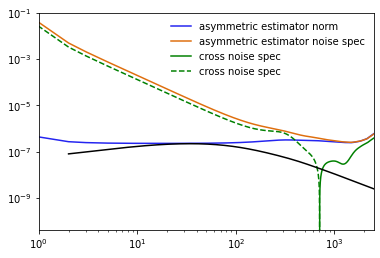

In [30]:
xlim(1,2500)
#ylim(1e-8,1e-6)
xscale('log')
yscale('log')
plot(L,Lfac*Ag0,label='asymmetric estimator norm')
plot(L,Lfac*Ag0**2*Ng0,label='asymmetric estimator noise spec')
plot(L,Lfac*Ag0*Bg0*Xg0,label='cross noise spec',color='g')
plot(L,-Lfac*Ag0*Bg0*Xg0,label='cross noise spec',color='g',ls='--')
plot(L[2:],ucl[3][2:]/Tcmb**2*(L[2:]+1)**2/(L[2:]**2)/4.,color='k')
legend()